In [3]:
# K-Means Clustering - Segmentación de Clientes

# Paso 1: Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib


In [4]:
# Paso 2: Cargar el dataset desde la ruta local
ruta = "/Users/fredmulato//Desktop/Model_creditoPersonal.csv"
df = pd.read_csv(ruta)

In [5]:
# Vista previa del dataset para entender su estructura
print("Primeras filas del dataset:")
df.head()

Primeras filas del dataset:


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
# Paso 3: Selección de variables para clustering
features = [
    'Age', 'Experience', 'Income', 'Family', 'CCAvg',
    'Education', 'Mortgage', 'Securities Account', 'CD Account',
    'Online', 'CreditCard'
]

X = df[features]

In [7]:
# Paso 4: Escalado de las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


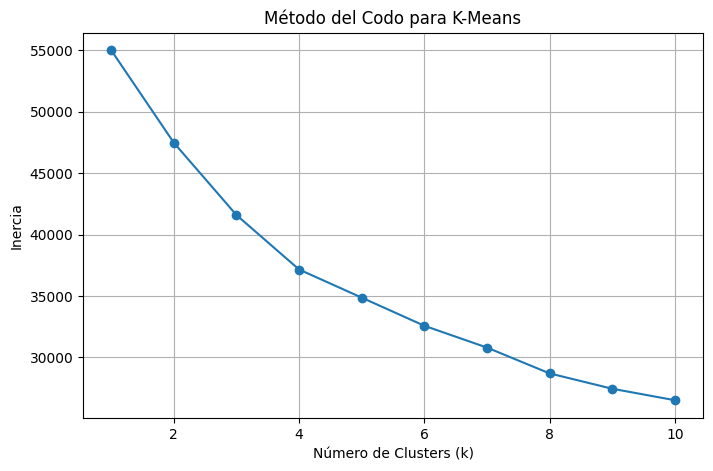

In [9]:
# Paso 5: Determinar el número óptimo de clusters (Método del Codo)
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()


In [10]:
# Paso 6: Entrenamiento del modelo K-Means
# Utilizamos el valor de k seleccionado a partir del codo (ej. k=3)
k = 3  # puedes ajustar según lo observado en la gráfica del codo
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

In [11]:
# Añadimos los clusters como nueva columna al dataframe original
df['Cluster'] = clusters

In [12]:
# Paso 7: Análisis descriptivo de los clusters
# Calculamos los promedios de cada variable por grupo para interpretar sus perfiles
cluster_summary = df.groupby('Cluster')[features].mean()
print("Resumen de clusters:")
cluster_summary

Resumen de clusters:


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Cluster,,,,,,,,,,,
0,45.701987,20.572848,104.589404,2.460265,2.878974,1.927152,92.324503,0.486755,1.0,0.937086,0.794702
1,35.489996,10.316731,77.924649,2.445722,2.126173,1.816943,58.233716,0.085143,0.0,0.552150,0.253299
2,55.140060,29.832269,65.661984,2.338868,1.628719,1.939123,50.157940,0.074500,0.0,0.597701,0.270328


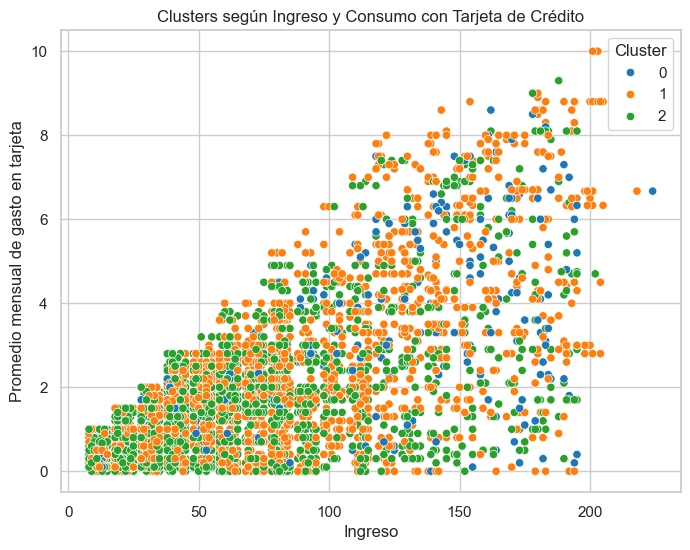

In [13]:
# Paso 8: Visualización de resultados
# Gráfico 1: Dispersión entre Ingreso y Consumo Promedio en Tarjeta de Crédito
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Income', y='CCAvg', hue='Cluster', palette='tab10')
plt.title('Clusters según Ingreso y Consumo con Tarjeta de Crédito')
plt.xlabel('Ingreso')
plt.ylabel('Promedio mensual de gasto en tarjeta')
plt.show()

/var/folders/xb/tnn5cnz546z_22tq9t1fbf1h0000gn/T/ipykernel_56538/1809196565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Income', palette='Set2')


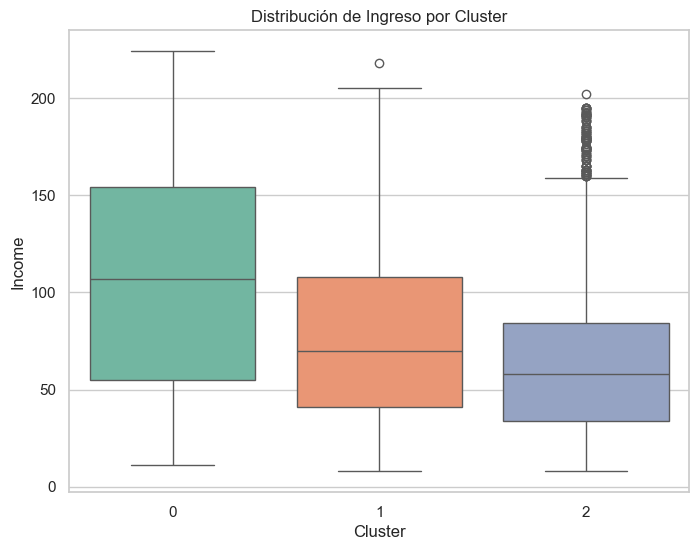

In [14]:
# Gráfico 2: Boxplot para visualizar distribución de ingresos por cluster
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Cluster', y='Income', palette='Set2')
plt.title('Distribución de Ingreso por Cluster')
plt.show()

In [16]:
# Paso 10: Guardar modelo entrenado
ruta_modelo = "../models"
os.makedirs(ruta_modelo, exist_ok=True)
joblib.dump(kmeans, os.path.join(ruta_modelo, "modelo_kmeans.pkl"))

['../models/modelo_kmeans.pkl']